<a href="https://colab.research.google.com/github/ketanmewara/Twitter-Sentiment-Analysis/blob/main/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import re 
import nltk # for text manipulation
import string
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.set_option("display.max_colwidth",200)
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Google Colab/Twitter Sentiment Analysis/train_E6oV3lV.csv")
test = pd.read_csv("/content/drive/MyDrive/Google Colab/Twitter Sentiment Analysis/test_tweets_anuFYb8.csv")

In [ ]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


## Data Inpection

In [ ]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [ ]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [ ]:
#We have to remove unnecessory word

In [ ]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [ ]:
train.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

 label '1' denotes 7% the tweet is racist/sexist and
 label '0' denotes 93%the tweet is not racist/sexist

In [ ]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()

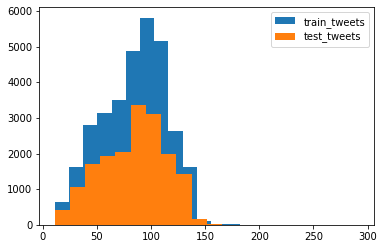

In [ ]:
plt.hist(length_train,bins=20,label='train_tweets')
plt.hist(length_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

## Data Cleaning

In [ ]:
Data = train.append(test,ignore_index=True)
Data.shape

(49159, 3)

In [ ]:
# Remove Unwanted text pattern and word from the tweets
def remove_text(input_txt, pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [ ]:
# 1. Remove @user
Data['right_tweet'] = np.vectorize(remove_text)(Data['tweet'],"@[\w]*")

In [ ]:
Data.head()

,id,label,tweet,right_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
# 2. Remove Punctuation, Numbers, Special Charaters
Data['right_tweet'] = Data['right_tweet'].str.replace("[^a-zA-Z#]"," ")

In [ ]:
Data.head()

,id,label,tweet,right_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [ ]:
# 3. Remove Short Words like: hmm, oh etc
Data['right_tweet'] = Data['right_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [ ]:
Data.head()

,id,label,tweet,right_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [ ]:
# 4.Text Normalization
tokenized_tweets = Data['right_tweet'].apply(lambda x: x.split()) #tokenizing
tokenized_tweets.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: right_tweet, dtype: object

In [ ]:
# Now we can normalize tokenize tweets
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
Data['right_tweet'] = tokenized_tweets

In [ ]:
Data.head()

,id,label,tweet,right_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


## Story Generation and Visualization from tweets
In this section we will explore the cleaned tweets.

### A. Understanding the common words used in the tweets: WordCloud

In [ ]:
all_word = ' '.join([text for text in Data['right_tweet']])

In [ ]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_word)

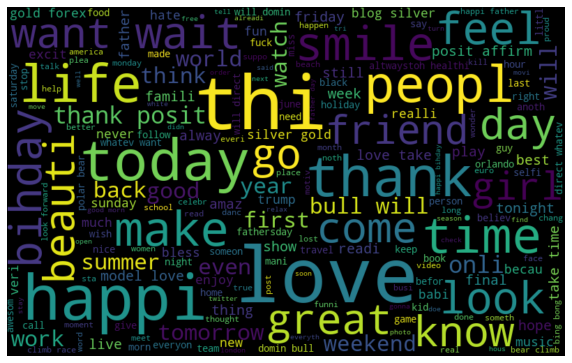

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# we can see most of the word are positive or neutral. like love,great,life,friend are the 
# most frequent ones.

### B. Word in non racist/sexist tweets

In [ ]:
normal_words = ' '.join([text for text in Data.right_tweet[Data.label == 0]])

In [ ]:
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)

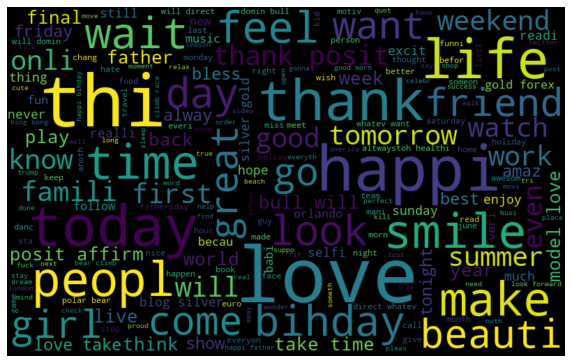

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### C. Racist/Sexist tweets

In [ ]:
negative_words = ' '.join([text for text in Data['right_tweet'][Data.label == 1]])

In [ ]:
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=100).generate(negative_words)

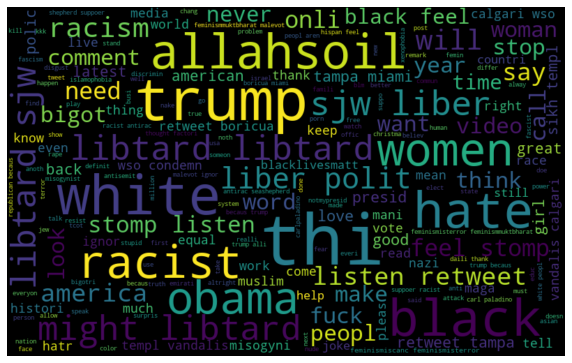

In [ ]:
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### D. Understanding the impact of Hashtags on tweets sentiments

In [ ]:
# function to collect to Hashtags
def collect_Hashtags(x):
    Hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        Hashtags.append(ht)
    return Hashtags

In [ ]:
HT_regular = collect_Hashtags(Data.right_tweet[Data.label == 0])
HT_negative = collect_Hashtags(Data.right_tweet[Data.label == 1])

In [ ]:
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

### Non Racist/Sexist Tweets

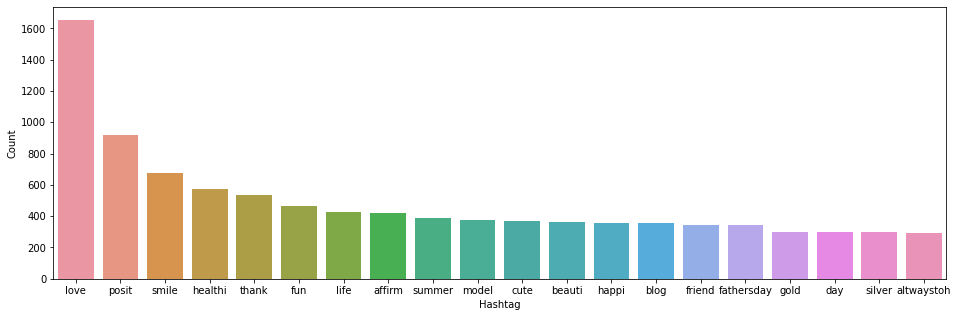

In [ ]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d,x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

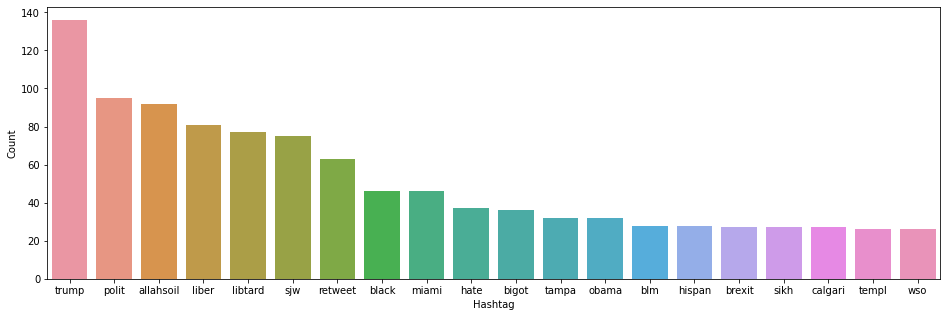

In [ ]:
a = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())})

# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e,x="Hashtag", y="Count")
ax.set(ylabel = 'Count')
plt.show()

## Bag-of-Words Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [ ]:
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow = bow_vectorizer.fit_transform(Data.right_tweet)

In [ ]:
bow.shape

(49159, 1000)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(Data.right_tweet)

In [ ]:
tfidf.shape

(49159, 1000)

## Word2Vec Features
####  Let's train Word2Vec model

In [ ]:
%%time
tokenized_tweets = Data.right_tweet.apply(lambda x: x.split()) #tokenizing
model_w2v = gensim.models.Word2Vec(tokenized_tweets,size=200,#desire no. of feature/independent varible
                                  window=5, #context window size
                                  min_count=2, 
                                  sg=1 #skip-gram model
                                  #hs=0, 
                                  #negative=10 
                                  #workers=2 #no. of cores
                                  #seed=34
                                  )

CPU times: user 17.2 s, sys: 52.8 ms, total: 17.2 s
Wall time: 10.5 s


In [ ]:
model_w2v.train(tokenized_tweets,total_examples= len(Data.right_tweet),epochs=20)

(6510273, 7536020)

In [ ]:
model_w2v.wv.most_similar(positive="dinner")

[('#cellar', 0.6025805473327637),
 ('spaghetti', 0.5958672761917114),
 ('#biall', 0.5824936628341675),
 ('dess', 0.5781480073928833),
 ('aladdin', 0.5774052739143372),
 ('noodl', 0.5737898349761963),
 ('#avocado', 0.573418915271759),
 ('burrito', 0.5673294067382812),
 ('cookout', 0.5623114109039307),
 ('wynwood', 0.5583365559577942)]

In [ ]:
model_w2v.wv.most_similar(positive="trump")

[('donald', 0.5923517942428589),
 ('hillari', 0.5593124628067017),
 ('potu', 0.5462936758995056),
 ('unstabl', 0.537667989730835),
 ('#delegaterevolt', 0.5351631045341492),
 ('phoni', 0.5317725539207458),
 ('nomine', 0.5307512283325195),
 ('melo', 0.5297941565513611),
 ('tomlin', 0.5270389318466187),
 ('fraud', 0.5196722149848938)]

In [ ]:
model_w2v.wv.most_similar(positive="hate")

[('bigotri', 0.5099842548370361),
 ('wat', 0.5092606544494629),
 ('muzzi', 0.5075283050537109),
 ('persecut', 0.5062911510467529),
 ('antic', 0.49315890669822693),
 ('inflict', 0.49077779054641724),
 ('baffl', 0.48387619853019714),
 ('crayon', 0.4836108088493347),
 ('conniv', 0.48322874307632446),
 ('entrench', 0.4810856580734253)]

In [ ]:
model_w2v['food']

array([-0.26477438,  0.00700129, -0.61296135, -0.06713736,  0.22130309,
       -0.6444047 ,  0.23429331, -0.17258205, -0.07663783,  0.7578485 ,
        0.01312782,  0.17817506,  0.354886  ,  0.23151425,  0.32346824,
        0.86977756, -0.01262664, -0.06693912,  0.19984059,  0.1260572 ,
       -0.02767648, -1.026057  ,  0.09861983, -0.45055014,  0.00185693,
        0.43401632,  0.11599021, -0.08130121,  0.25245583, -0.44875795,
       -0.05334758, -0.22644095,  0.5134556 ,  0.17299213,  0.628666  ,
       -0.00815623, -0.37005967,  0.14665662, -0.10130191,  0.01418464,
       -0.07879678,  0.6763576 ,  0.19638468,  0.08778358,  0.48336616,
       -0.5713039 , -0.24410832,  0.54050565, -0.6843842 , -0.46399882,
        0.6589965 , -0.03719912,  0.23535252,  0.3511983 ,  0.50935143,
       -0.4823439 ,  0.02810078, -0.24187922,  0.33550906,  0.25046593,
       -0.36402103, -0.13166885,  0.5234945 , -0.4197794 ,  0.24132296,
        0.6082289 ,  0.06509136, -0.10056214,  0.09974214, -0.09

In [ ]:
len(model_w2v['food'])

200

#### Preparing Vectors for Tweets

In [ ]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
wordvec_arrays = np.zeros((len(tokenized_tweets), 200)) 
for i in range(len(tokenized_tweets)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweets[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(49159, 200)

### 2. Doc2Vec Embedding

In [ ]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweets) # label all the tweets

In [ ]:
labeled_tweets[:6]

[LabeledSentence(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunct', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['thank', '#lyft', 'credit', 'caus', 'they', 'offer', 'wheelchair', 'van', '#disapoint', '#getthank'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'love', 'take', 'with', 'time'], tags=['tweet_3']),
 LabeledSentence(words=['factsguid', 'societi', '#motiv'], tags=['tweet_4']),
 LabeledSentence(words=['huge', 'fare', 'talk', 'befor', 'they', 'leav', 'chao', 'disput', 'when', 'they', 'there', '#allshowandnogo'], tags=['tweet_5'])]

#### Now let’s train a doc2vec model.

In [ ]:
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

model_d2v.train(labeled_tweets, total_examples= len(Data['right_tweet']), epochs=15)

100%|██████████| 49159/49159 [00:00<00:00, 3270278.52it/s]


CPU times: user 1min 32s, sys: 32.7 s, total: 2min 5s
Wall time: 1min 30s


#### Preparing doc2vec Feature Set

In [ ]:
docvec_arrays = np.zeros((len(tokenized_tweets), 200)) 
for i in range(len(Data)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:

## 1.Logistic Regression
## 2.Support Vector Machine
## 3.RandomForest
## 4.XGBoost
 
## Evaluation Metric

F1 score is being used as the evaluation metric. It is the weighted average of Precision and Recall.

## 1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

### Bag-of-Words Features
### We will first try to fit the logistic regression model on the Bag-of-Words (BoW) features.

In [ ]:
# Extracting train and test BoW features 
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 

# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(xtrain_bow, ytrain) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5303408146300915

In [ ]:
#Now let’s make predictions for the test dataset and create a submission file.
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

### TF-IDF Features
### We’ll follow the same steps as above, but now for the TF-IDF feature set.

In [ ]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:] 

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain) 

prediction = lreg.predict_proba(xvalid_tfidf)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int) 

f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

0.5451327433628319

### Word2Vec Features

In [ ]:
train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]

xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain) 

prediction = lreg.predict_proba(xvalid_w2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.6175595238095238

### Doc2Vec Features

In [ ]:
train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:] 

xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain) 

prediction = lreg.predict_proba(xvalid_d2v)

prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

0.36285468615649186

## 2.SVM

In [ ]:
from sklearn import svm

### Bag-of-Words Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain) 
prediction = svc.predict_proba(xvalid_bow) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5088207985143919

In [ ]:
#Again let’s make predictions for the test dataset and create another submission file.
test_pred = svc.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_svm_bow.csv', index=False)

### TF-IDF Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain) 
prediction = svc.predict_proba(xvalid_tfidf) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.5100182149362478

### Word2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.6171875

### Doc2Vec Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain) 
prediction = svc.predict_proba(xvalid_d2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int)

0.20256111757857975

## 3.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Bag-of-Words Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow) 
f1_score(yvalid, prediction) # validation score

0.5529225908372828

In [ ]:
#Let’s make predictions for the test dataset and create another submission file.

test_pred = rf.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_rf_bow.csv', index=False)

### TF-IDF Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_tfidf, ytrain) 
prediction = rf.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.562152133580705

### Word2Vec Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_w2v, ytrain) 
prediction = rf.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.511134676564157

### Doc2Vec Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_d2v, ytrain) 
prediction = rf.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.06770098730606489

## 4.XGboost

In [ ]:
from xgboost import XGBClassifier

### Bag-of-Words Features

In [ ]:
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

0.5130687318489837

In [ ]:
test_pred = xgb_model.predict(test_bow)
test['label'] = test_pred
submission = test[['id','label']]
submission.to_csv('sub_xgb_bow.csv', index=False)

### TF-IDF Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain) 
prediction = xgb.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

0.5185891325071497

### Word2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_w2v, ytrain) 
prediction = xgb.predict(xvalid_w2v)
f1_score(yvalid, prediction)

0.6510369702434625

### Doc2Vec Features

In [ ]:
xgb = XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3).fit(xtrain_d2v, ytrain) 
prediction = xgb.predict(xvalid_d2v)
f1_score(yvalid, prediction)

0.3422818791946309